In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fetching Data
iris = pd.read_csv("../data/iris.csv")
iris["variety"].replace("Setosa", 0, inplace=True)
iris["variety"].replace("Versicolor", 1, inplace=True)
iris["variety"].replace("Virginica", 2, inplace=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = np.array(iris.drop("variety", axis=1))
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y = np.array(iris["variety"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Splitting Data
np.random.seed(0)
indices = np.random.permutation(len(X))
train_indices, test_indices = indices[:int(0.8 * len(X))], indices[int(0.8 * len(X)):]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [6]:
# Neural Network Parameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(np.unique(y_train))
learning_rate = 0.01
epochs = 1000

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# Graph Data
mse_history = []
accuracy_history = []

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)
    
    error = y_train.reshape(-1, 1) - predicted_output
    mse = np.mean(error ** 2)
    mse_history.append(mse)
    
    # Back Propagation
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden_layer) * learning_rate

    # Accuracy
    y_pred = np.argmax(predicted_output, axis=1)
    accuracy = np.mean(y_train == y_pred)
    accuracy_history.append(accuracy * 100)

# Confusion matrix
y_pred_test = np.argmax(sigmoid(np.dot(sigmoid(np.dot(X_test, weights_input_hidden)), weights_hidden_output)), axis=1)
conf_matrix = np.zeros((output_size, output_size), dtype=int)
for i in range(len(y_test)):
    conf_matrix[y_test[i]][y_pred_test[i]] += 1
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  0 11]
 [ 0  0  9]]


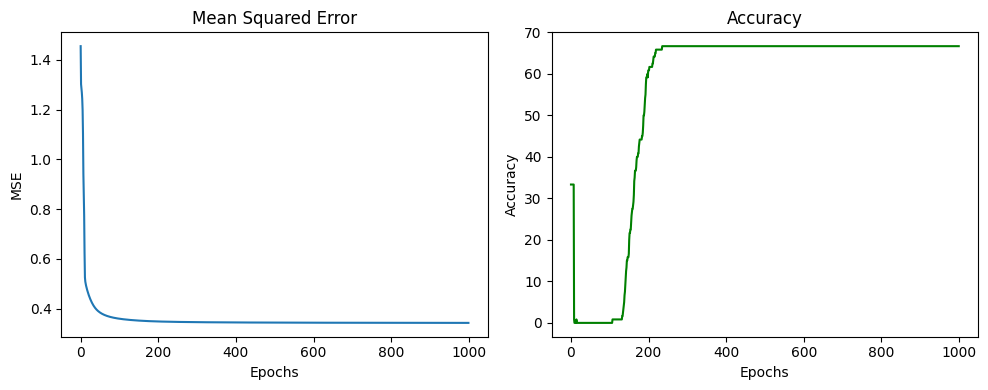

In [7]:
# Plot Graphs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(mse_history)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.tight_layout()
plt.show()
